In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_linnerud

In [2]:
df = pd.read_csv("used_cars_data.csv")

In [3]:
df.head()

,Engine,Kilometers_Driven,Mileage,New_Price,Power,S.No.,Seats,Year,Owner_Type,Fuel_Type,Transmission,Name,Location,Price
0,998.0,72000.0,26.60,2.277956e+06,58.16,0.0,5,2010.0,First,CNG,Manual,Fourth Tier,West,175000.0
1,1582.0,41000.0,19.67,2.277970e+06,126.20,1.0,5,2015.0,First,Diesel,Manual,Fourth Tier,West,1250000.0
2,1199.0,46000.0,18.20,8.610000e+05,88.70,2.0,5,2011.0,First,Petrol,Manual,Fourth Tier,East,450000.0
3,1248.0,87000.0,20.77,2.277949e+06,88.76,3.0,7,2012.0,First,Diesel,Manual,Fourth Tier,East,600000.0
4,1968.0,40670.0,15.20,2.277970e+06,140.80,4.0,5,2013.0,Second,Diesel,Automatic,Second Tier,South,1774000.0


In [4]:
def convert_scientific_to_integer(a):
    return int(a)

df['New_Price'] = df['New_Price'].apply(convert_scientific_to_integer)
df.head()

,Engine,Kilometers_Driven,Mileage,New_Price,Power,S.No.,Seats,Year,Owner_Type,Fuel_Type,Transmission,Name,Location,Price
0,998.0,72000.0,26.60,2277955,58.16,0.0,5,2010.0,First,CNG,Manual,Fourth Tier,West,175000.0
1,1582.0,41000.0,19.67,2277969,126.20,1.0,5,2015.0,First,Diesel,Manual,Fourth Tier,West,1250000.0
2,1199.0,46000.0,18.20,861000,88.70,2.0,5,2011.0,First,Petrol,Manual,Fourth Tier,East,450000.0
3,1248.0,87000.0,20.77,2277949,88.76,3.0,7,2012.0,First,Diesel,Manual,Fourth Tier,East,600000.0
4,1968.0,40670.0,15.20,2277970,140.80,4.0,5,2013.0,Second,Diesel,Automatic,Second Tier,South,1774000.0


In [5]:
df.dtypes

Engine               float64
Kilometers_Driven    float64
Mileage              float64
New_Price              int64
Power                float64
S.No.                float64
Seats                  int64
Year                 float64
Owner_Type            object
Fuel_Type             object
Transmission          object
Name                  object
Location              object
Price                float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7251 entries, 0 to 7250
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Engine             7251 non-null   float64
 1   Kilometers_Driven  7251 non-null   float64
 2   Mileage            7251 non-null   float64
 3   New_Price          7251 non-null   int64  
 4   Power              7251 non-null   float64
 5   S.No.              7251 non-null   float64
 6   Seats              7251 non-null   int64  
 7   Year               7251 non-null   float64
 8   Owner_Type         7251 non-null   object 
 9   Fuel_Type          7251 non-null   object 
 10  Transmission       7251 non-null   object 
 11  Name               7251 non-null   object 
 12  Location           7251 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 793.2+ KB


In [7]:
df.isnull().sum()

Engine                  0
Kilometers_Driven       0
Mileage                 0
New_Price               0
Power                   0
S.No.                   0
Seats                   0
Year                    0
Owner_Type              0
Fuel_Type               0
Transmission            0
Name                    0
Location                0
Price                1232
dtype: int64

In [8]:
df.shape

(7251, 14)

In [9]:
df.nunique()

Engine                195
Kilometers_Driven    3660
Mileage               440
New_Price             743
Power                 557
S.No.                7251
Seats                   8
Year                   22
Owner_Type              4
Fuel_Type               5
Transmission            2
Name                    5
Location                4
Price                1373
dtype: int64

In [10]:
num_cols = list(df._get_numeric_data().columns)
num_cols

['Engine',
 'Kilometers_Driven',
 'Mileage',
 'New_Price',
 'Power',
 'S.No.',
 'Seats',
 'Year',
 'Price']

In [11]:
cat_cols = list(set(df.columns) - set(num_cols))
cat_cols

['Location', 'Name', 'Transmission', 'Owner_Type', 'Fuel_Type']

In [12]:
# Unique values in each feature;
uniques = {}
for col in cat_cols:
    uniques[df[col].name] = df[col].nunique()

unique_values = pd.DataFrame.from_dict(uniques, orient='index')
unique_values.columns = ['Count']
unique_values

,Count
Location,4
Name,5
Transmission,2
Owner_Type,4
Fuel_Type,5


In [13]:
# looking at value counts for non-numeric features
num_to_display = 10
for colname in df.dtypes[(df.dtypes == 'object') | (df.dtypes == 'category')].index:
    val_counts = df[colname].value_counts(dropna=False)
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n')

First             5952
Second            1150
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64



Diesel      3851
Petrol      3324
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Manual       5202
Automatic    2049
Name: Transmission, dtype: int64



Fourth Tier    4369
Third Tier     1249
Second Tier    1029
Fifth Tier      436
First Tier      168
Name: Name, dtype: int64



East     2395
South    1984
West     1713
North    1159
Name: Location, dtype: int64





In [14]:
# Viewing the data statistics
df.describe()

,Engine,Kilometers_Driven,Mileage,New_Price,Power,S.No.,Seats,Year,Price
count,7251.000000,7.251000e+03,7251.000000,7.251000e+03,7251.000000,7251.000000,7251.000000,7251.000000,6.019000e+03
mean,1617.072492,5.869939e+04,18.143477,2.277961e+06,112.278858,3625.168253,5.278444,2013.368915,9.479468e+05
std,593.710970,8.443927e+04,4.562611,1.033530e+06,53.300389,2093.582786,0.809156,3.246986,1.118792e+06
min,72.000000,1.710000e+02,0.000000,3.910000e+05,34.200000,0.000000,2.000000,1998.000000,4.400000e+04
25%,1198.000000,3.400000e+04,15.200000,2.277949e+06,75.000000,1812.500000,5.000000,2011.000000,3.500000e+05
50%,1493.000000,5.341600e+04,18.160000,2.277961e+06,94.000000,3625.000000,5.000000,2014.000000,5.640000e+05
75%,1968.000000,7.300000e+04,21.100000,2.277970e+06,138.030000,5437.500000,5.000000,2016.000000,9.950000e+05
max,5998.000000,6.500000e+06,33.540000,3.750000e+07,616.000000,7252.000000,10.000000,2019.000000,1.600000e+07


In [15]:
categorical_names = ['Name', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Location']

In [16]:
# Unique values in each feature;
uniques = {}
for col in categorical_names:
    uniques[df[col].name] = df[col].nunique()

unique_values = pd.DataFrame.from_dict(uniques, orient='index')
unique_values.columns = ['Count']
unique_values

,Count
Name,5
Fuel_Type,5
Transmission,2
Owner_Type,4
Seats,8
Location,4


# **visualisation**

In [17]:
#list for graphs
list_numerical = df.select_dtypes(include=np.number).columns.tolist()

In [18]:
# Mean, Median and Mode
for i in list_numerical:
    mean=df[i].mean()
    median=df[i].median()
    mode=df[i].tolist()[0]
    print(f'Feature: {i}, Mean: {mean}, Median: {median}, Mode: {mode}')

Feature: Engine, Mean: 1617.072491941754, Median: 1493.0, Mode: 998.0
Feature: Kilometers_Driven, Mean: 58699.393876706665, Median: 53416.0, Mode: 72000.0
Feature: Mileage, Mean: 18.14347693131386, Median: 18.16, Mode: 26.6
Feature: New_Price, Mean: 2277960.583505723, Median: 2277961.0, Mode: 2277955
Feature: Power, Mean: 112.27885764650539, Median: 94.0, Mode: 58.16
Feature: S.No., Mean: 3625.168252654806, Median: 3625.0, Mode: 0.0
Feature: Seats, Mean: 5.278444352503103, Median: 5.0, Mode: 5
Feature: Year, Mean: 2013.3689146324646, Median: 2014.0, Mode: 2010.0
Feature: Price, Mean: 947946.835022429, Median: 564000.0, Mode: 175000.0


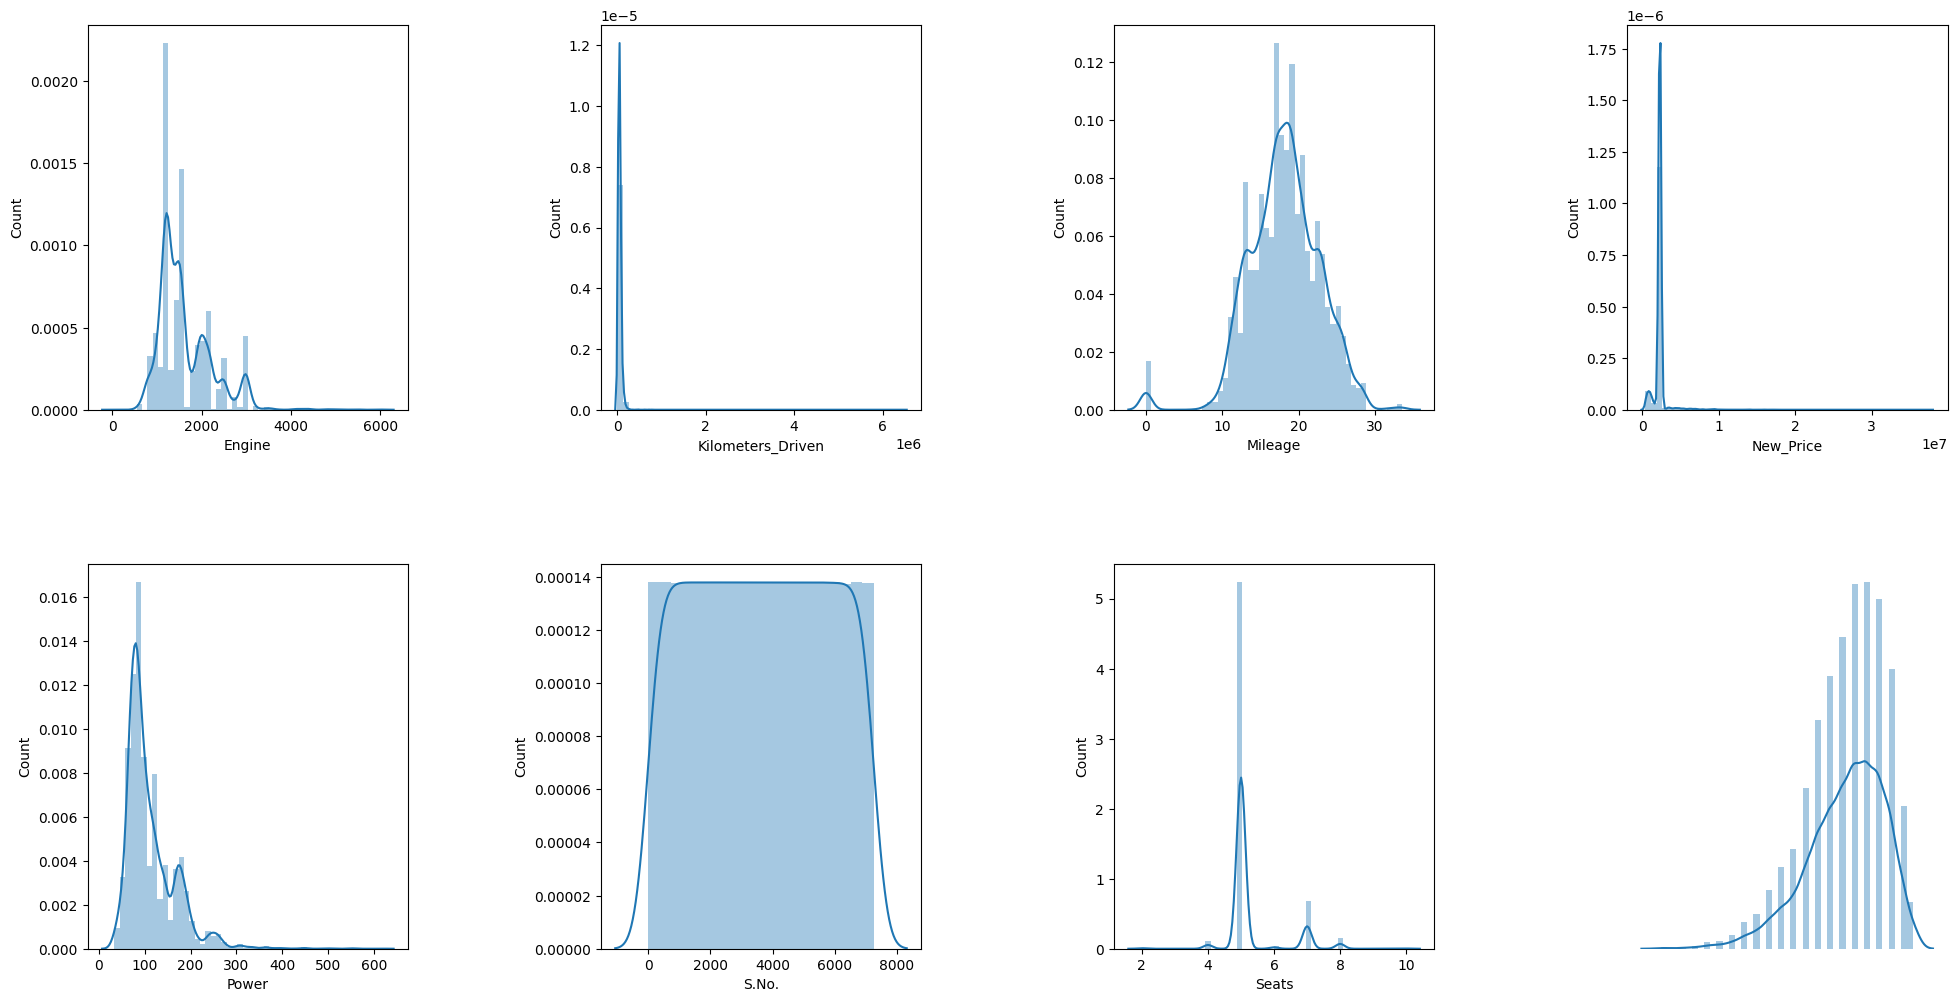

In [19]:
# Visually checking distributions
fig, axes = plt.subplots(2, 4, figsize=(24,12))
fig.subplots_adjust(hspace=0.4, wspace=0.6)
for axis, element in zip(axes.flat, list_numerical):
    sns.distplot(df[element], ax=axis);
    axis.set(ylabel="Count")
    axes[1,3].set_axis_off();

In [20]:
df.columns

Index(['Engine', 'Kilometers_Driven', 'Mileage', 'New_Price', 'Power', 'S.No.',
       'Seats', 'Year', 'Owner_Type', 'Fuel_Type', 'Transmission', 'Name',
       'Location', 'Price'],
      dtype='object')

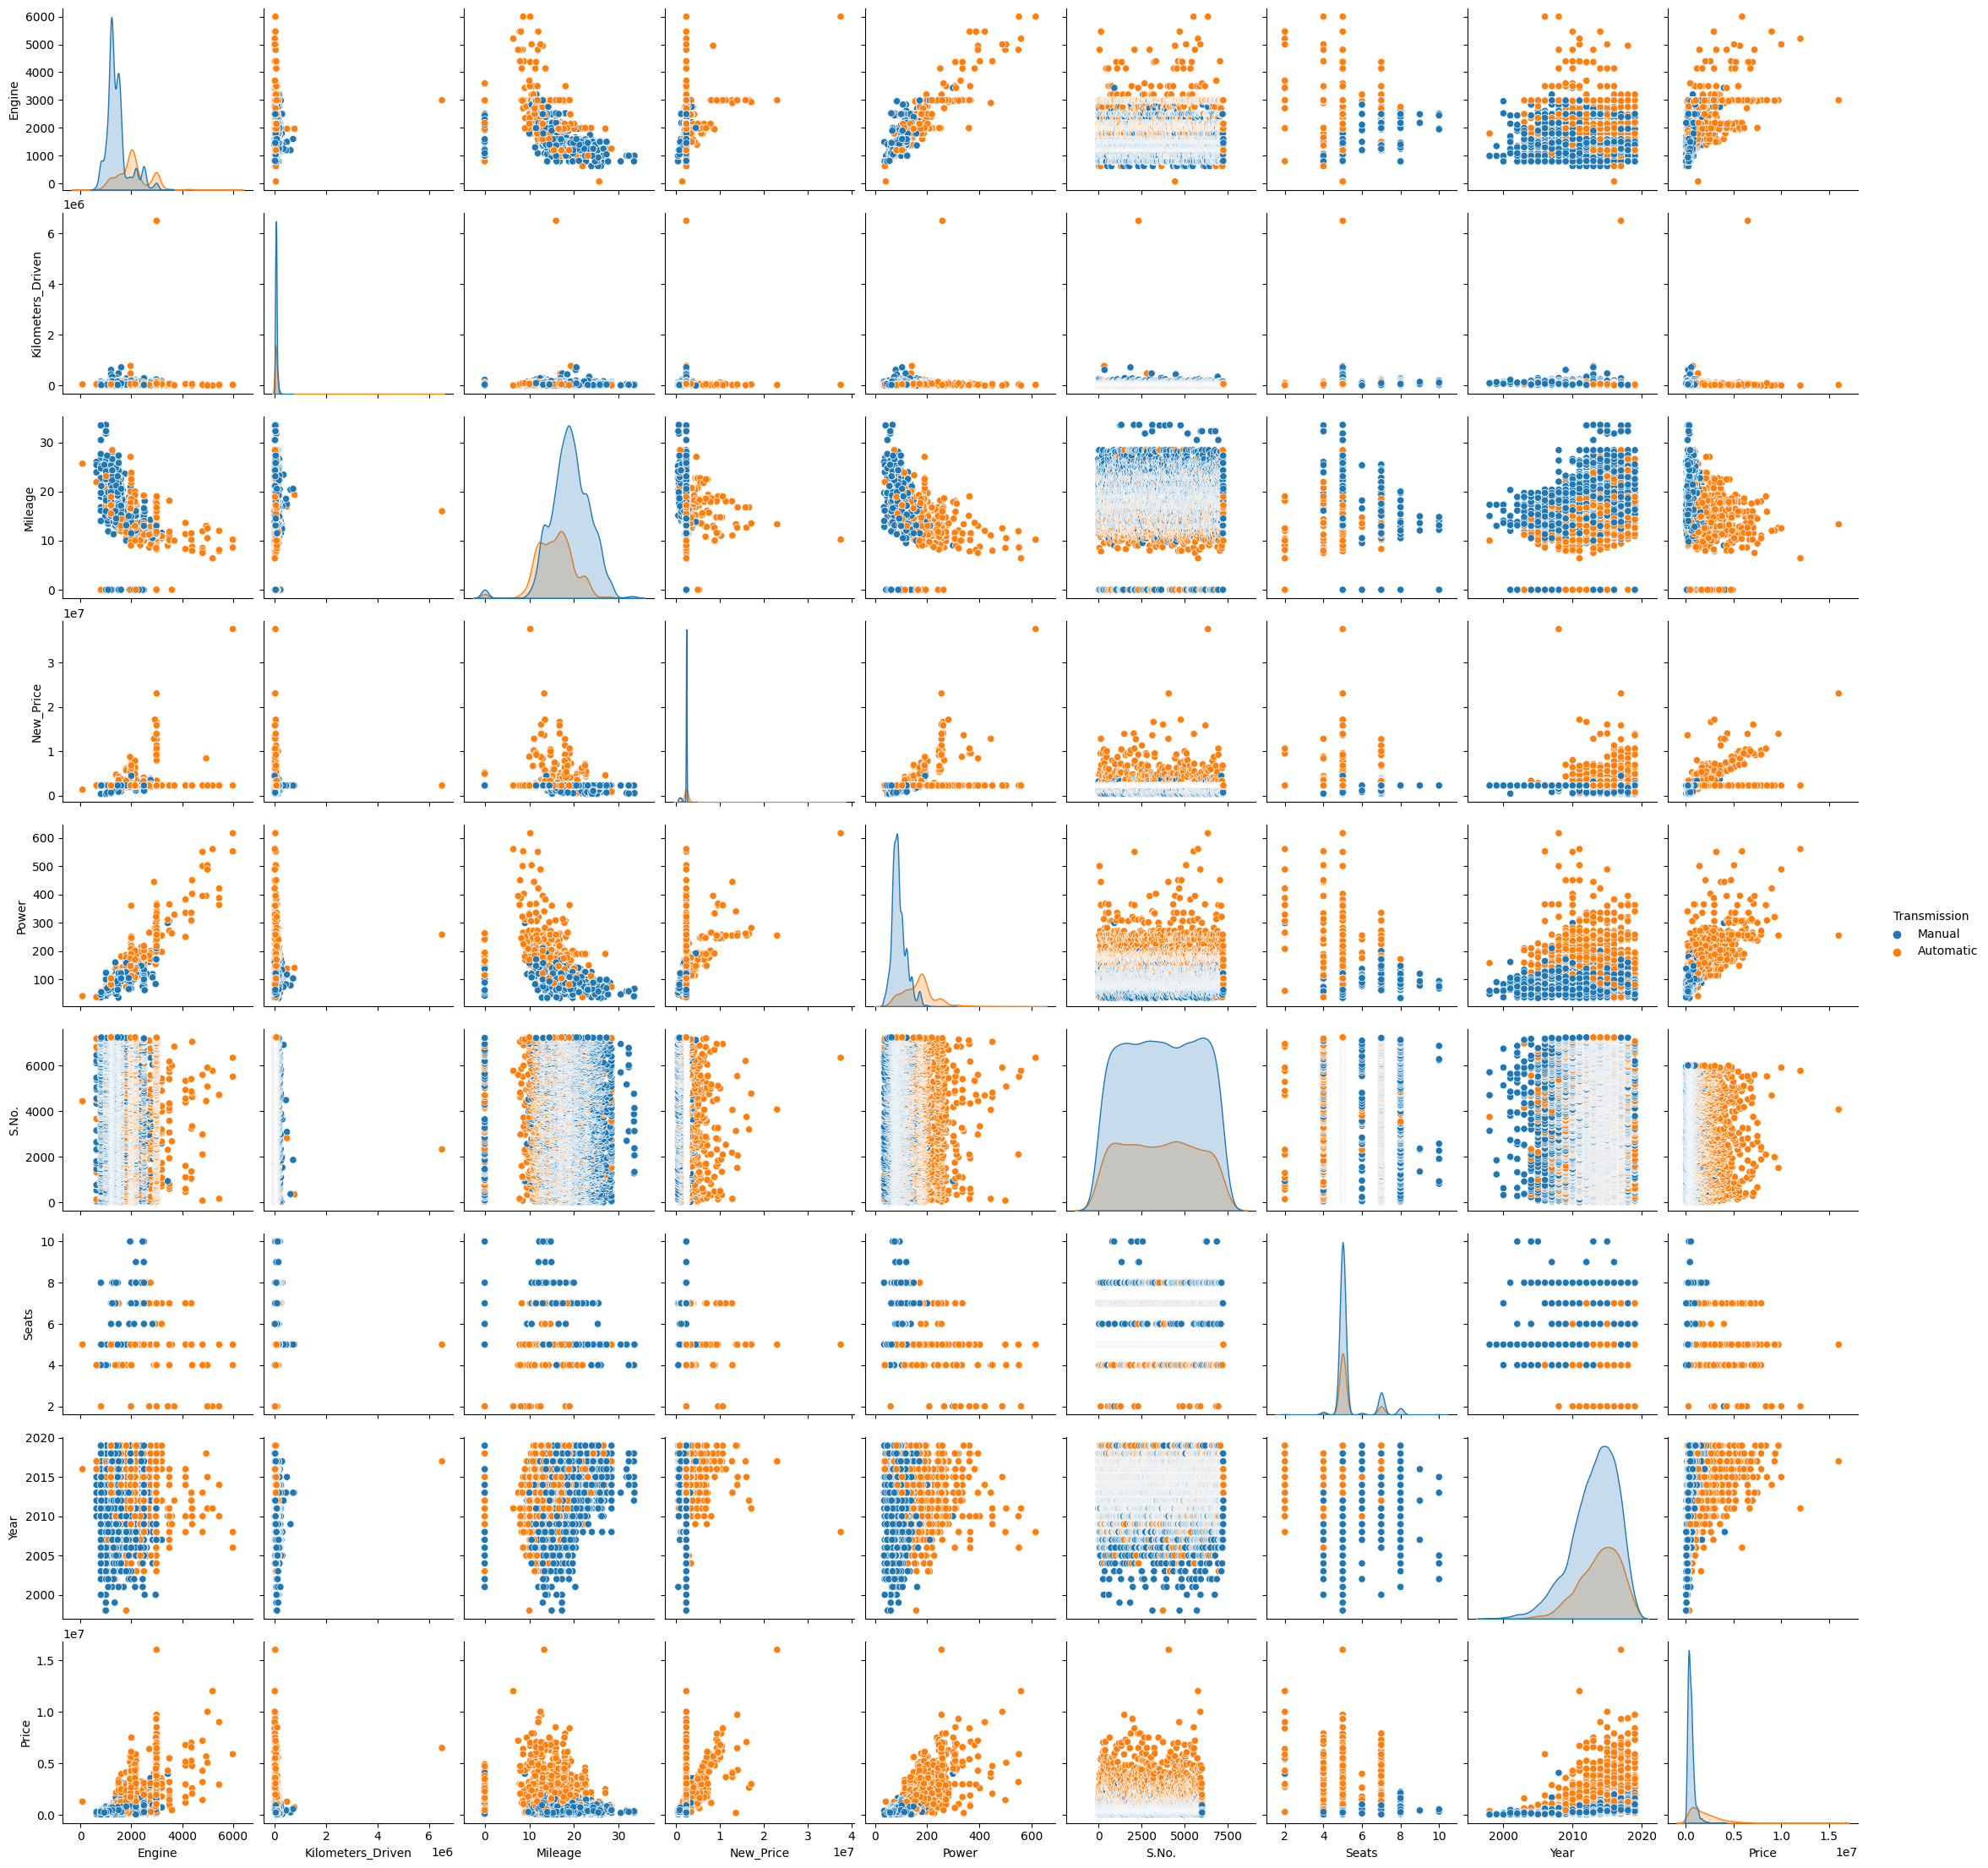

In [21]:
# Bivariate analysis
sns.pairplot(df, hue='Transmission');

In [22]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(9, 9)

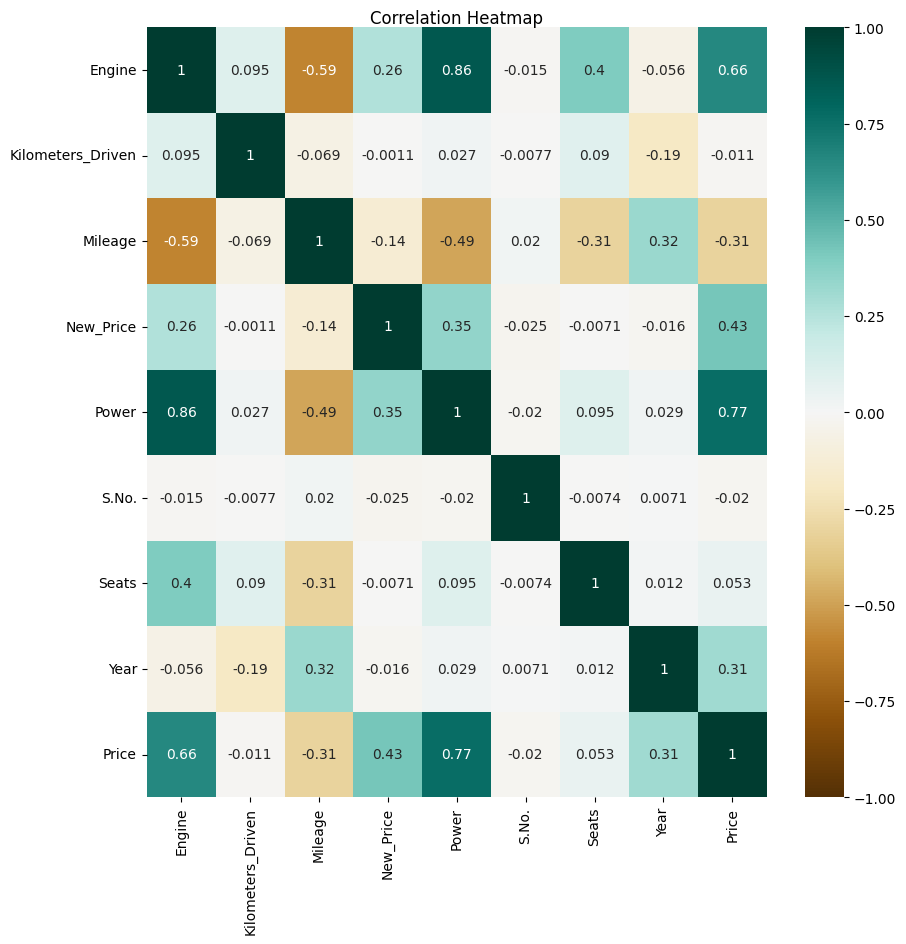

In [23]:
plt.figure(figsize=(10,10))

# A better color to see the positive or negative correlation of each variable
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2);

**Positive and negative correlations**

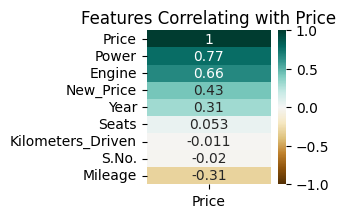

In [24]:
# Correlation with target feature (Price_log)
plt.figure(figsize=(2,2))
heatmap = sns.heatmap(df.corr()[['Price']].sort_values(by='Price', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':12}, pad=5);

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7251 entries, 0 to 7250
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Engine             7251 non-null   float64
 1   Kilometers_Driven  7251 non-null   float64
 2   Mileage            7251 non-null   float64
 3   New_Price          7251 non-null   int64  
 4   Power              7251 non-null   float64
 5   S.No.              7251 non-null   float64
 6   Seats              7251 non-null   int64  
 7   Year               7251 non-null   float64
 8   Owner_Type         7251 non-null   object 
 9   Fuel_Type          7251 non-null   object 
 10  Transmission       7251 non-null   object 
 11  Name               7251 non-null   object 
 12  Location           7251 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 793.2+ KB


In [26]:
df_partial = df[:6019]

In [27]:
# First data set for modeling
df_partial.sample(1)

,Engine,Kilometers_Driven,Mileage,New_Price,Power,S.No.,Seats,Year,Owner_Type,Fuel_Type,Transmission,Name,Location,Price
2782,1396.0,82450.0,23.0,2277950,90.0,2782.0,5,2014.0,First,Diesel,Manual,Fourth Tier,North,585000.0


In [28]:
categorical_names

['Name', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Location']

In [29]:
# Unique values in each feature;
uniques = {}
for col in categorical_names:
    uniques[df[col].name] = df[col].nunique()

unique_values = pd.DataFrame.from_dict(uniques, orient='index')
unique_values.columns = ['Count']
unique_values

,Count
Name,5
Fuel_Type,5
Transmission,2
Owner_Type,4
Seats,8
Location,4


HotEncoder

In [30]:
# df_partial = pd.get_dummies(df_partial, columns=['Name', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Location'], drop_first=True)
# df_partial.head()

LabelEncoder

In [31]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Name', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Location' are categorical columns
categorical_columns = ['Name', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Location']

label_encoder = LabelEncoder()

for col in categorical_columns:
    df_partial[col] = label_encoder.fit_transform(df_partial[col])

df_partial.head()


,Engine,Kilometers_Driven,Mileage,New_Price,Power,S.No.,Seats,Year,Owner_Type,Fuel_Type,Transmission,Name,Location,Price
0,998.0,72000.0,26.60,2277955,58.16,0.0,5,2010.0,0,0,1,2,3,175000.0
1,1582.0,41000.0,19.67,2277969,126.20,1.0,5,2015.0,0,1,1,2,3,1250000.0
2,1199.0,46000.0,18.20,861000,88.70,2.0,5,2011.0,0,4,1,2,0,450000.0
3,1248.0,87000.0,20.77,2277949,88.76,3.0,7,2012.0,0,1,1,2,0,600000.0
4,1968.0,40670.0,15.20,2277970,140.80,4.0,5,2013.0,2,1,0,3,2,1774000.0


Save prepare nodel data

In [32]:
#import pandas as pd

# Assuming df is your preprocessed DataFrame
#df_partial.to_csv('Model_data.csv', index=False)

# **Prepare and Split Data for Models**

In [33]:
# Prepare and Split Data for Models
#X = df_partial.drop(['Price'], axis=1)
#y = df_partial[['Price']]

X = df_partial.drop(['Power'], axis=1)
y = df_partial[['Power']]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)

print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (4815, 13)
Size of test set: (1204, 13)


# 1-Model building - Linear Regression:

In [34]:
# Create a Linear Regression Model:
logreg = LinearRegression()

# Train the model using the training sets
logreg.fit(X_train , y_train)

LinearRegression()

1. Mean Absolute Error (MAE):

In [35]:
from sklearn.metrics import mean_absolute_error

# Prediction on train data
y_pred = logreg.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Mean Absolute Error: {mae}')

# Prediction on test data
y_pred = logreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 12.53397865583042
Mean Absolute Error: 12.807838144328166


2. Mean Squared Error (MSE):

In [36]:
from sklearn.metrics import mean_squared_error

# Prediction on train data
y_pred = logreg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

# Prediction on test data
y_pred = logreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 338.7015457487672
Mean Squared Error: 396.7300789603745


3. R Squared Scour:

In [37]:
from sklearn.metrics import r2_score

# Prediction on train data
y_pred = logreg.predict(X_train)
r2s = r2_score(y_train, y_pred)
print("R Squared Error : ", r2s)

# Prediction on test data
y_pred = logreg.predict(X_test)
r2s = r2_score(y_test, y_pred)
print("R Squared Error : ", r2s)

R Squared Error :  0.8786182764395805
R Squared Error :  0.8780898547014985


4. Explained Variance Score:

In [38]:
from sklearn.metrics import explained_variance_score

# Prediction on train data
y_pred = logreg.predict(X_train)
evs = explained_variance_score(y_train, y_pred)
print("Explained Variance Error : ", evs)

# Prediction on test data
y_pred = logreg.predict(X_test)
evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Error : ", evs)

Explained Variance Error :  0.8786182764395805
Explained Variance Error :  0.8782233463321905


In [39]:
print("Finish Model 1 Alhamdllah")

Finish Model 1 Alhamdllah


# 2-Model building - Ridge Regression:

In [40]:
# Create a Ridge Regression Model:
from sklearn.linear_model import Ridge
m_Rid = Ridge()

# Train the model using the training sets
m_Rid.fit(X_train,y_train)

Ridge()

1. Mean Absolute Error (MAE):

In [41]:
from sklearn.metrics import mean_absolute_error

# Prediction on train data
y_pred = m_Rid.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Mean Absolute Error: {mae}')

# Prediction on test data
y_pred = m_Rid.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 12.533375896431897
Mean Absolute Error: 12.807167550822074


2. Mean Squared Error (MSE):

In [42]:
from sklearn.metrics import mean_squared_error

# Prediction on train data
y_pred = m_Rid.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

# Prediction on test data
y_pred = m_Rid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 338.7016364822325
Mean Squared Error: 396.7153781732802


3. R Squared Scour:

In [43]:
from sklearn.metrics import r2_score

# Prediction on train data
y_pred = m_Rid.predict(X_train)
r2s = r2_score(y_train, y_pred)
print("R Squared Error : ", r2s)

# Prediction on test data
y_pred = m_Rid.predict(X_test)
r2s = r2_score(y_test, y_pred)
print("R Squared Error : ", r2s)

R Squared Error :  0.8786182439230935
R Squared Error :  0.8780943720678029


4. Explained Variance Score:

In [44]:
from sklearn.metrics import explained_variance_score

# Prediction on train data
y_pred = m_Rid.predict(X_train)
evs = explained_variance_score(y_train, y_pred)
print("Explained Variance Error : ", evs)

# Prediction on test data
y_pred = m_Rid.predict(X_test)
evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Error : ", evs)

Explained Variance Error :  0.8786182439230935
Explained Variance Error :  0.8782279466544827


In [45]:
print("Finish Model 2 Alhamdllah")

Finish Model 2 Alhamdllah


# 3-Model building - Lasso Regression:

In [46]:
# Create a Lasso Regression Model:
from sklearn.linear_model import Lasso
m_Las = Lasso()

# Train the model using the training sets
m_Las.fit(X_train,y_train)

Lasso()

1. Mean Absolute Error (MAE):

In [47]:
from sklearn.metrics import mean_absolute_error

# Prediction on train data
y_pred = m_Las.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Mean Absolute Error: {mae}')

# Prediction on test data
y_pred = m_Las.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 12.414090445516099
Mean Absolute Error: 12.697432465325441


2. Mean Squared Error (MSE):

In [48]:
from sklearn.metrics import mean_squared_error

# Prediction on train data
y_pred = m_Las.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

# Prediction on test data
y_pred = m_Las.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 349.5466989719051
Mean Squared Error: 406.2183569460423


3. R Squared Scour:

In [49]:
from sklearn.metrics import r2_score

# Prediction on train data
y_pred = m_Las.predict(X_train)
r2s = r2_score(y_train, y_pred)
print("R Squared Error : ", r2s)

# Prediction on test data
y_pred = m_Las.predict(X_test)
r2s = r2_score(y_test, y_pred)
print("R Squared Error : ", r2s)

R Squared Error :  0.8747316588347179
R Squared Error :  0.8751742266480458


4. Explained Variance Score:

In [50]:
from sklearn.metrics import explained_variance_score

# Prediction on train data
y_pred = m_Las.predict(X_train)
evs = explained_variance_score(y_train, y_pred)
print("Explained Variance Error : ", evs)

# Prediction on test data
y_pred = m_Las.predict(X_test)
evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Error : ", evs)

Explained Variance Error :  0.8747316588347179
Explained Variance Error :  0.8753512127010282


In [51]:
print("Finish Model 3 Alhamdllah")

Finish Model 3 Alhamdllah


# 4-Model building - Decision Tree Regression:

In [52]:
# Create a Decision Tree Regression Model:
from sklearn.tree import DecisionTreeRegressor
m_Dtr = DecisionTreeRegressor()

# Train the model using the training sets
m_Dtr.fit(X_train,y_train)

DecisionTreeRegressor()

1. Mean Absolute Error (MAE):

In [53]:
from sklearn.metrics import mean_absolute_error

# Prediction on train data
y_pred = m_Dtr.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Mean Absolute Error: {mae}')

# Prediction on test data
y_pred = m_Dtr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 9.429632568031236e-15
Mean Absolute Error: 4.252261502039038


2. Mean Squared Error (MSE):

In [54]:
from sklearn.metrics import mean_squared_error

# Prediction on train data
y_pred = m_Dtr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

# Prediction on test data
y_pred = m_Dtr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7.943093700733545e-28
Mean Squared Error: 303.8816745314896


3. R Squared Scour:

In [55]:
from sklearn.metrics import r2_score

# Prediction on train data
y_pred = m_Dtr.predict(X_train)
r2s = r2_score(y_train, y_pred)
print("R Squared Error : ", r2s)

# Prediction on test data
y_pred = m_Dtr.predict(X_test)
r2s = r2_score(y_test, y_pred)
print("R Squared Error : ", r2s)

R Squared Error :  1.0
R Squared Error :  0.9066209973472013


4. Explained Variance Score:

In [56]:
from sklearn.metrics import explained_variance_score

# Prediction on train data
y_pred = m_Dtr.predict(X_train)
evs = explained_variance_score(y_train, y_pred)
print("Explained Variance Error : ", evs)

# Prediction on test data
y_pred = m_Dtr.predict(X_test)
evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Error : ", evs)

Explained Variance Error :  1.0
Explained Variance Error :  0.9068137326073292


In [57]:
print("Finish Model 4 Alhamdllah")

Finish Model 4 Alhamdllah


# 5-Model building - Random Forest Regression:

In [58]:
# Create a Random Forest Regression Model:
from sklearn.ensemble import RandomForestRegressor
m_Rfr = RandomForestRegressor()

# Train the model using the training sets
m_Rfr.fit(X_train,y_train)

RandomForestRegressor()

1. Mean Absolute Error (MAE):

In [59]:
from sklearn.metrics import mean_absolute_error

# Prediction on train data
y_pred = m_Rfr.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Mean Absolute Error: {mae}')

# Prediction on test data
y_pred = m_Rfr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1.3446949758609934
Mean Absolute Error: 4.031920336467912


2. Mean Squared Error (MSE):

In [60]:
from sklearn.metrics import mean_squared_error

# Prediction on train data
y_pred = m_Rfr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

# Prediction on test data
y_pred = m_Rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 11.784496290685071
Mean Squared Error: 192.70142277103108


3. R Squared Scour:

In [61]:
from sklearn.metrics import r2_score

# Prediction on train data
y_pred = m_Rfr.predict(X_train)
r2s = r2_score(y_train, y_pred)
print("R Squared Error : ", r2s)

# Prediction on test data
y_pred = m_Rfr.predict(X_test)
r2s = r2_score(y_test, y_pred)
print("R Squared Error : ", r2s)

R Squared Error :  0.9957767465516212
R Squared Error :  0.9407852852730363


4. Explained Variance Score:

In [62]:
from sklearn.metrics import explained_variance_score

# Prediction on train data
y_pred = m_Rfr.predict(X_train)
evs = explained_variance_score(y_train, y_pred)
print("Explained Variance Error : ", evs)

# Prediction on test data
y_pred = m_Rfr.predict(X_test)
evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Error : ", evs)

Explained Variance Error :  0.995777278400179
Explained Variance Error :  0.940878603706348


In [63]:
print("Finish Model 5 Alhamdllah")

Finish Model 5 Alhamdllah


# 6-Model building - Support Vector Regression (SVR):

In [64]:
# Create a Support Vector Regression (SVR) Model:
from sklearn.svm import SVR
m_Svr = SVR()

# Train the model using the training sets
m_Svr.fit(X_train,y_train)

SVR()

1. Mean Absolute Error (MAE):

In [65]:
from sklearn.metrics import mean_absolute_error

# Prediction on train data
y_pred = m_Svr.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Mean Absolute Error: {mae}')

# Prediction on test data
y_pred = m_Svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 21.222779212895922
Mean Absolute Error: 21.555347680303807


2. Mean Squared Error (MSE):

In [66]:
from sklearn.metrics import mean_squared_error

# Prediction on train data
y_pred = m_Svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

# Prediction on test data
y_pred = m_Svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1132.062028636563
Mean Squared Error: 1307.5733329283612


3. R Squared Scour:

In [67]:
from sklearn.metrics import r2_score

# Prediction on train data
y_pred = m_Svr.predict(X_train)
r2s = r2_score(y_train, y_pred)
print("R Squared Error : ", r2s)

# Prediction on test data
y_pred = m_Svr.predict(X_test)
r2s = r2_score(y_test, y_pred)
print("R Squared Error : ", r2s)

R Squared Error :  0.5942987508089601
R Squared Error :  0.5981992204284968


4. Explained Variance Score:

In [68]:
from sklearn.metrics import explained_variance_score

# Prediction on train data
y_pred = m_Svr.predict(X_train)
evs = explained_variance_score(y_train, y_pred)
print("Explained Variance Error : ", evs)

# Prediction on test data
y_pred = m_Svr.predict(X_test)
evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Error : ", evs)

Explained Variance Error :  0.6173722228451229
Explained Variance Error :  0.6191110383373977


In [69]:
print("Finish Model 6 Alhamdllah")

Finish Model 6 Alhamdllah


# 7-Model building - Gradient Boosting Regression:

In [70]:
# Create a Gradient Boosting Regression Model:
from sklearn.ensemble import GradientBoostingRegressor
m_Gbr = GradientBoostingRegressor()

# Train the model using the training sets
m_Gbr.fit(X_train,y_train)

GradientBoostingRegressor()

1. Mean Absolute Error (MAE):

In [71]:
from sklearn.metrics import mean_absolute_error

# Prediction on train data
y_pred = m_Gbr.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Mean Absolute Error: {mae}')

# Prediction on test data
y_pred = m_Gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 7.150165835761402
Mean Absolute Error: 8.107029994014669


2. Mean Squared Error (MSE):

In [72]:
from sklearn.metrics import mean_squared_error

# Prediction on train data
y_pred = m_Gbr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

# Prediction on test data
y_pred = m_Gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 110.23152936366976
Mean Squared Error: 215.84098883101504


3. R Squared Scour:

In [73]:
from sklearn.metrics import r2_score

# Prediction on train data
y_pred = m_Gbr.predict(X_train)
r2s = r2_score(y_train, y_pred)
print("R Squared Error : ", r2s)

# Prediction on test data
y_pred = m_Gbr.predict(X_test)
r2s = r2_score(y_test, y_pred)
print("R Squared Error : ", r2s)

R Squared Error :  0.9604959198066727
R Squared Error :  0.933674788716009


4. Explained Variance Score:

In [74]:
from sklearn.metrics import explained_variance_score

# Prediction on train data
y_pred = m_Gbr.predict(X_train)
evs = explained_variance_score(y_train, y_pred)
print("Explained Variance Error : ", evs)

# Prediction on test data
y_pred = m_Gbr.predict(X_test)
evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Error : ", evs)

Explained Variance Error :  0.9604959198066727
Explained Variance Error :  0.9336837313287213


In [75]:
print("Finish Model 7 Alhamdllah")

Finish Model 7 Alhamdllah


# Apply Pipeline

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np
import pandas as pd

# Load your data
df_pip = pd.read_csv("used_cars_data.csv")

# Select features and target variable
X = df_pip.drop(['Power'], axis=1)
y = df_pip[['Power']]

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

# Create preprocessor for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('SVR', SVR()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

# Create a pipeline for each model
for model_name, model in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R Squared: {r2}")
    print(f"Explained Variance Score: {evs}")
    print("------")


Model: Linear Regression
Mean Absolute Error: 11.610493261035199
Mean Squared Error: 338.3194893094689
R Squared: 0.8990410809295764
Explained Variance Score: 0.8991641487487579
------
Model: Random Forest
Mean Absolute Error: 3.2678919470471857
Mean Squared Error: 128.669269911755
R Squared: 0.9616034227458033
Explained Variance Score: 0.9617204804706586
------
Model: SVR
Mean Absolute Error: 15.402647383850033
Mean Squared Error: 1287.1336549157097
R Squared: 0.6159026405345878
Explained Variance Score: 0.6201433050900348
------
Model: Decision Tree
Mean Absolute Error: 2.8981211899574855
Mean Squared Error: 140.48397569444657
R Squared: 0.958077761462174
Explained Variance Score: 0.9582807705085978
------
Model: Gradient Boosting
Mean Absolute Error: 8.196583518434437
Mean Squared Error: 213.47913872976562
R Squared: 0.9362950590454236
Explained Variance Score: 0.9365243183736708
------


# Predict

In [77]:
def predict_power(row, model_pipeline):
    """
    Predict the 'Power' using the trained model pipeline.

    Parameters:
    - row: Pandas DataFrame row containing features for prediction.
    - model_pipeline: Trained scikit-learn pipeline.

    Returns:
    - Prediction for 'Power'.
    """
    # Create a DataFrame with a single row for prediction
    input_data = pd.DataFrame([row], columns=row.index)

    # Make predictions using the model pipeline
    prediction = model_pipeline.predict(input_data)

    return prediction[0]  # Assuming the prediction is a 1D array, extract the value

# Example usage:
row_to_predict = X_test.iloc[1]  # Replace this with your own row of data
predicted_power = predict_power(row_to_predict, pipeline)

print(f"Predicted Power: {predicted_power}")


Predicted Power: 82.09140636264773


# Save Model to Pickle file

In [78]:

import pickle
from google.colab import files

# ... (your previous code)

# Assuming you have a trained model named 'pipeline' (the last model in your loop)
model_to_save = pipeline

# Save the model and preprocessing steps to a Pickle file
with open('car_power_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(model_to_save, model_file)

# Download the Pickle file
files.download('car_power_prediction_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Save Model to h5 file

In [79]:

import joblib
from google.colab import files

# ... (your previous code)

# Assuming you have a trained model named 'pipeline' (the last model in your loop)
model_to_save = pipeline

# Save the model and preprocessing steps to an HDF5 file
joblib.dump(model_to_save, 'car_power_prediction_model.h5')

# Download the HDF5 file
files.download('car_power_prediction_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>